In [1]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('TS1.csv')


In [4]:
df

,date,price
0,01-01-2016 00:00,24.290449
1,01-01-2016 01:00,24.181921
2,01-01-2016 02:00,24.026831
3,01-01-2016 03:00,24.166022
4,01-01-2016 04:00,22.981534
5,01-01-2016 05:00,23.946516
6,01-01-2016 06:00,23.521429
7,01-01-2016 07:00,23.922219
8,01-01-2016 08:00,23.154174
9,01-01-2016 09:00,18.671965


In [6]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'date': 'ds', 'price': 'y'})

# Make the prophet model and fit on the data
df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
df_prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [7]:
# Make a future dataframe for 2 months
df_forecast = df_prophet.make_future_dataframe(periods=30 * 2, freq='D')
# Make predictions
df_forecast = df_prophet.predict(df_forecast)

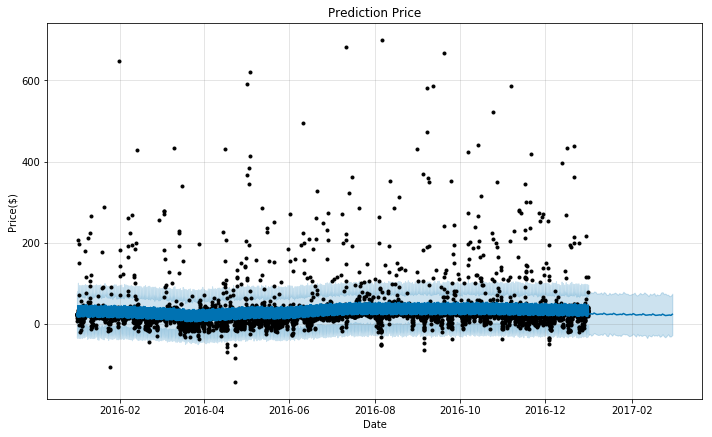

In [8]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Price($)')
plt.title('Prediction Price');

In [9]:
print(df_forecast)

                      ds      trend  trend_lower  trend_upper  yhat_lower  \
0    2016-01-01 00:00:00  28.210594    28.210594    28.210594  -32.348897   
1    2016-01-01 01:00:00  28.207708    28.207708    28.207708  -29.835888   
2    2016-01-01 02:00:00  28.204822    28.204822    28.204822  -30.136397   
3    2016-01-01 03:00:00  28.201937    28.201937    28.201937  -27.021581   
4    2016-01-01 04:00:00  28.199051    28.199051    28.199051  -25.510946   
5    2016-01-01 05:00:00  28.196165    28.196165    28.196165  -24.703759   
6    2016-01-01 06:00:00  28.193280    28.193280    28.193280  -20.242508   
7    2016-01-01 07:00:00  28.190394    28.190394    28.190394  -22.959224   
8    2016-01-01 08:00:00  28.187508    28.187508    28.187508  -28.743533   
9    2016-01-01 09:00:00  28.184623    28.184623    28.184623  -30.112168   
10   2016-01-01 10:00:00  28.181737    28.181737    28.181737  -34.374997   
11   2016-01-01 11:00:00  28.178851    28.178851    28.178851  -34.082249   